## Predicitng the Survival of a passenger in a survival

In [1]:
import sys

sys.path.append('/Users/saiviswanth/Desktop/Nick_proj/env/lib/python3.9/site-packages')

## Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
train_data = pd.read_csv("titanic/train.csv" , index_col="PassengerId")
test_data = pd.read_csv("titanic/test.csv" , index_col = "PassengerId")

In [142]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
train_data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [14]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## Exploratory Data Analysis

In [16]:
# Null values are present we need to kind of deal it with 
# Especiallly the cabin feature which has more null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [19]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
# Outlier might be present in the SibSp , Parch , Fare feauture as max number is very
train_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [23]:
# Need to look into embarked categorical feature closely
train_data.describe(include="object") 

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

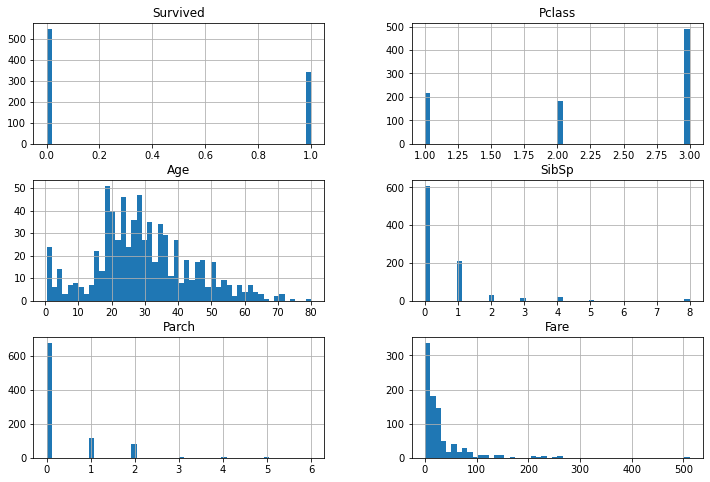

In [25]:
# Age and Fare have differnt scales - feature scaling
# Fare feature is right tailed so we need to transformatios to make it a bell or uniform shaped distributions
# Parch and SibSp might be imbalanced as 0 value i is high in both casses
train_data.hist(bins=50,figsize=(12,8))
plt.show()

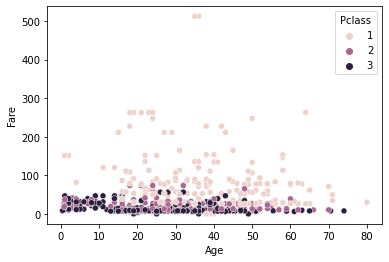

In [31]:
# No clear correlation between Fare and the class at which they boarded 
sns.scatterplot(x = "Age" , y = "Fare" , hue = "Pclass" , data = train_data)
plt.show()

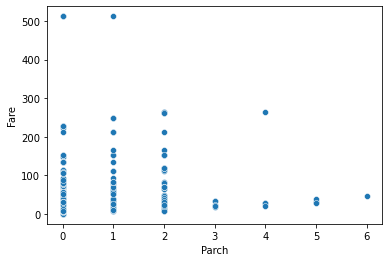

In [37]:
# More the children or the parents the fare got reduced
sns.scatterplot(x = "Parch" , y = "Fare" , data = train_data)
plt.show()

## Faster EDA with Data Profiling

In [39]:
# Import Pandas Profiling 
from pandas_profiling import ProfileReport

In [40]:
profile = ProfileReport(train_data , title="Pandas Profiling Report")

In [41]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
corr_matrix = train_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

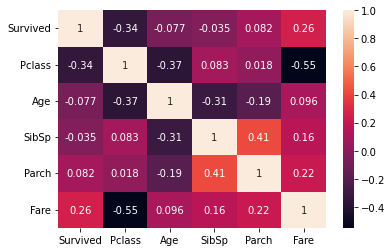

In [47]:
sns.heatmap(corr_matrix , annot=True)
plt.show()

In [ ]:
# Survived is highly correlated with Pclass , Fare and Sex
# Parch correlated with SibSp
# Pclass correalted with Fare
# Age is correalted with Pclass

In [48]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Analyze Single Categorical Features

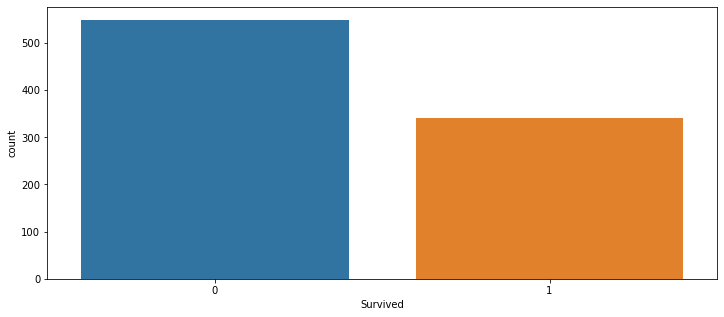

In [53]:
# It is not imbalanced dataset - little 
plt.figure(figsize=(12, 5))
sns.countplot(x = "Survived"  , data=train_data)
plt.show()

In [57]:
train_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

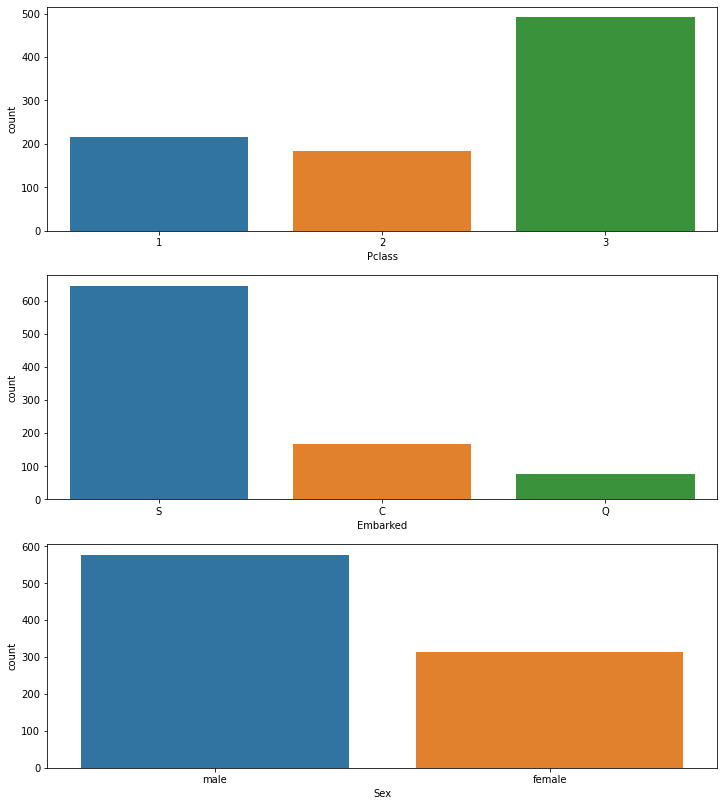

In [61]:
# See deeply in Pclass , Embarked , Sex 
# All are imbalanced features 
# Pclass - 1:1:2.5 (1,2,3)
# Embarked - 6:2:1 (S , C , Q)
# Sex - 2:1 (M , F)
fig , axes = plt.subplots(3 , figsize=(12 , 14))
sns.countplot(data = train_data , x = "Pclass" , ax = axes[0])
sns.countplot(data = train_data , x = "Embarked" , ax = axes[1])
sns.countplot(data = train_data , x = "Sex" , ax = axes[2])
plt.show()

### Analyze Numerical Features

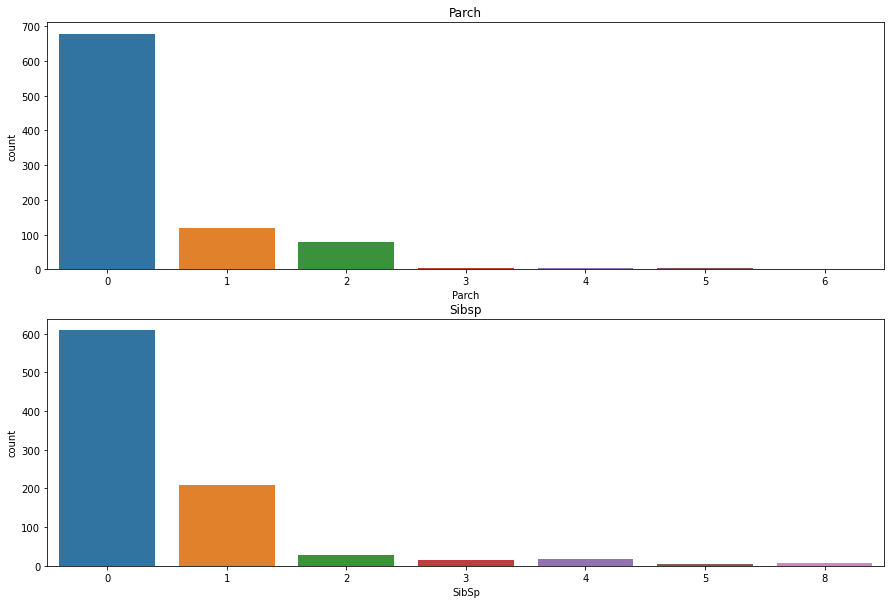

In [62]:
# Viz on Parch and Sibsp
# Most of the passengers travelled with either 1 , 2 children or 1,2 parents
fig , axs = plt.subplots(2 , figsize=(15,10))
sns.countplot(x = "Parch" , data=train_data , ax = axs[0]).set_title("Parch")
sns.countplot(x = "SibSp" , data=train_data , ax = axs[1]).set_title("Sibsp")
plt.show()

In [65]:
# Analyze numerical features to be skewed 
train_data["Fare"].skew()

4.787316519674893

In [66]:
train_data["log_Fare"] = np.log(train_data["Fare"] + 1)

In [67]:
train_data["log_Fare"].skew()

0.3949280095189306

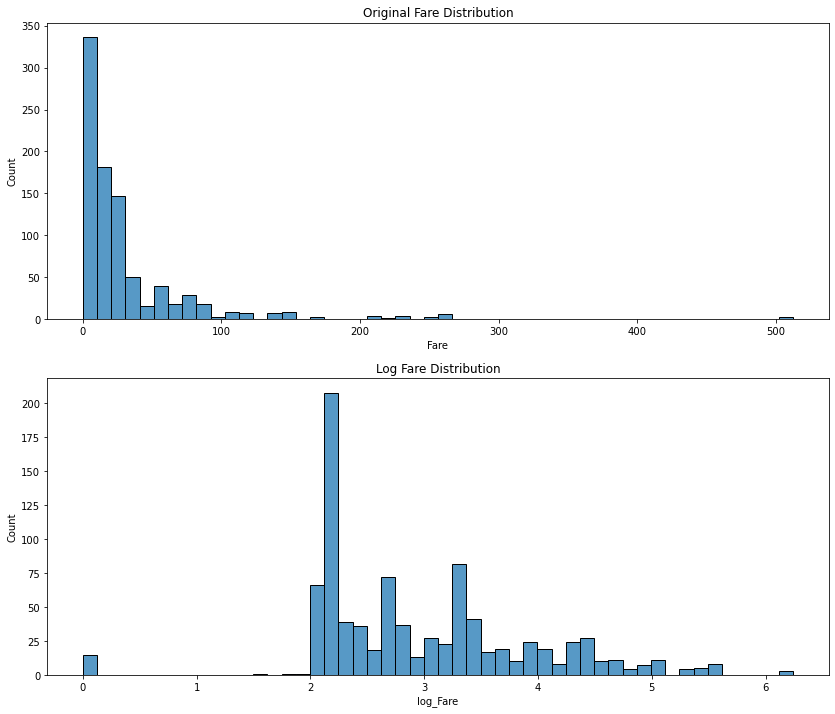

In [74]:
# Now the Log Fare Distribution has been transformed
fig , axs = plt.subplots(2 , figsize=(14,12))
sns.histplot(x = "Fare" , data = train_data , bins=50  , ax = axs[0]).set_title("Original Fare Distribution")
sns.histplot(x = "log_Fare" , data = train_data , bins=50  ,ax = axs[1]).set_title("Log Fare Distribution")
plt.show()

### Numerical and Categorical Realtionships 

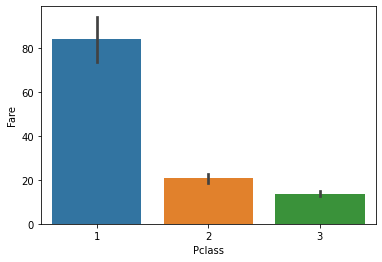

In [75]:
# Survived is highly correlated with Pclass , Fare and Sex
# Parch correlated with SibSp
# Pclass correalted with Fare
# Age is correalted with Pclass
sns.barplot(x="Pclass" , y = "Fare" , data = train_data) 
plt.show()

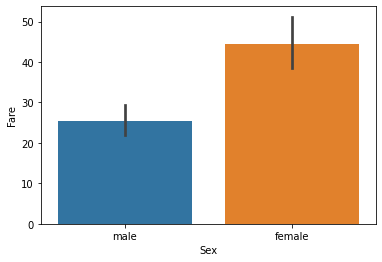

In [78]:
sns.barplot(x="Sex" , y = "Fare" , data = train_data) 
plt.show()

### Plot Survived Distributions

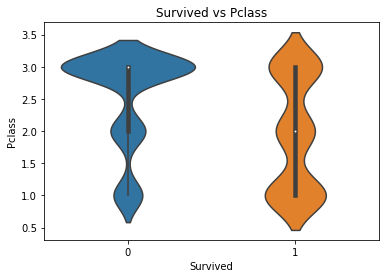

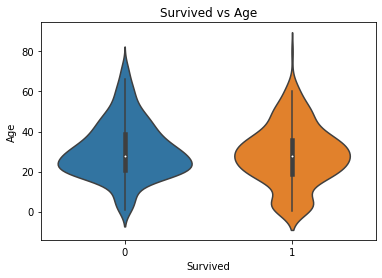

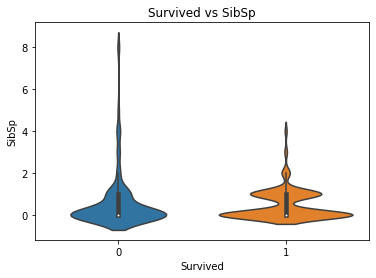

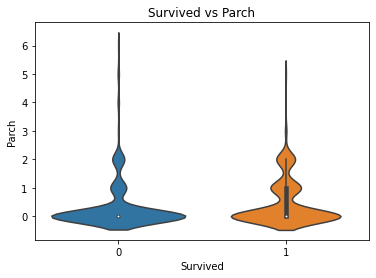

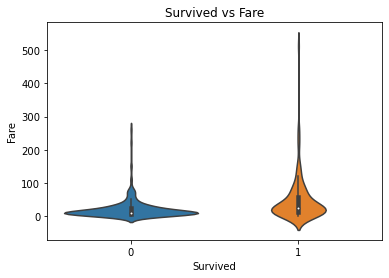

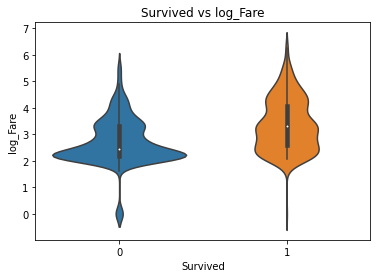

In [81]:
## The distributions of theb Survived and Pclass are different or we could say just the opposite
for col in train_data.select_dtypes(exclude="object").columns:
    if(col != "Survived"):
        sns.violinplot(x = "Survived" , y = col , data = train_data).set_title(f"Survived vs {col}")
        plt.show()
    else:
        continue

#### What about Categorical Relationships to Survival

In [82]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'log_Fare'],
      dtype='object')

In [83]:
# Here 50 percent of male couldnt survived which could tell at that time female was given priority
pivot_feature = "Sex"
pd.crosstab(train_data[pivot_feature] , train_data["Survived"]) / len(train_data)

Survived         0         1
Sex                         
female    0.090909  0.261504
male      0.525253  0.122334

In [86]:
for col in train_data.select_dtypes(include="object").columns:
    if(col != "Name"):
        display(pd.crosstab(train_data[col] , train_data["Survived"]) / len(train_data))

Survived         0         1
Sex                         
female    0.090909  0.261504
male      0.525253  0.122334

Survived            0         1
Ticket                         
110152       0.000000  0.003367
110413       0.001122  0.002245
110465       0.002245  0.000000
110564       0.000000  0.001122
110813       0.000000  0.001122
...               ...       ...
W./C. 6608   0.004489  0.000000
W./C. 6609   0.001122  0.000000
W.E.P. 5734  0.001122  0.000000
W/C 14208    0.001122  0.000000
WE/P 5735    0.001122  0.001122

[681 rows x 2 columns]

Survived         0         1
Cabin                       
A10       0.001122  0.000000
A14       0.001122  0.000000
A16       0.000000  0.001122
A19       0.001122  0.000000
A20       0.000000  0.001122
...            ...       ...
F33       0.000000  0.003367
F38       0.001122  0.000000
F4        0.000000  0.002245
G6        0.002245  0.002245
T         0.001122  0.000000

[147 rows x 2 columns]

Survived         0         1
Embarked                    
C         0.084175  0.104377
Q         0.052750  0.033670
S         0.479237  0.243547

### Checking if there is any relationship between Sex , Pclass and Fare And Survived

In [99]:
train_data["Fare_more_100"] = (train_data["Fare"] > 100).astype(int)

In [101]:
train_data["Survived_yes"] = train_data["Survived"].apply(lambda x : 1 if x==1 else 0)
train_data["Survived_no"] = train_data["Survived"].apply(lambda x: 0 if x==1 else 1)

In [103]:
train_data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  log_Fare  \
PassengerId                                                                     
1                1      0         A/5 21171   7.2500   NaN        S  2.110213   
2                1      0          PC 17599  71.2833   C85        C  4.280593   
3                0      0  STON/O2. 3101282   7.9250   NaN        S  2.188856   
4                1      0            113803  53.1000  C123        S  3.990834   
5                0      0            373450   8.0500   NaN        S  2.202765   

             Fare_more_100  Survived_yes  Survived_no  
PassengerId                                            
1                        0             0            1  
2                        0             1            0  
3                        0             1            0  
4                        0             1            0  
5                        0             0            1

In [113]:
train_data.groupby(["Sex" , "Pclass"]).sum(["Survived_yes" , "Survived_no"])[["Survived_yes" , "Survived_no"]] / len(train_data)

Survived_yes  Survived_no
Sex    Pclass                           
female 1           0.102132     0.003367
       2           0.078563     0.006734
       3           0.080808     0.080808
male   1           0.050505     0.086420
       2           0.019080     0.102132
       3           0.052750     0.336700

In [114]:
train_data.groupby(["Sex" , "Fare_more_100"]).sum(["Survived_yes" , "Survived_no"])[["Survived_yes" , "Survived_no"]] / len(train_data)

Survived_yes  Survived_no
Sex    Fare_more_100                           
female 0                  0.225589     0.088664
       1                  0.035915     0.002245
male   0                  0.114478     0.511785
       1                  0.007856     0.013468

## Relation between SibSp,  Parch and Survived 

In [126]:
# Create Columns of binary type for Parch and SibSp
train_data["Have_Parents/Children"] = train_data["Parch"].apply(lambda x: 1 if x >= 1 else 0)
train_data["Have_Sibling/Spouse"] = train_data["SibSp"].apply(lambda x: 1 if x >= 1 else 0)
# train_data[train_data["Parch"] >= 1]

In [139]:
train_data["Age_Older"] = train_data["Age"].apply(lambda x: 1 if x > 40 else 0)

In [131]:
train_data.groupby(["Have_Parents/Children" , "Have_Sibling/Spouse"]).sum(["Survived_yes", "Survived_no"])[["Survived_yes" , "Survived_no"]] / len(train_data)

Survived_yes  Survived_no
Have_Parents/Children Have_Sibling/Spouse                           
0                     0                        0.182941     0.419753
                      1                        0.078563     0.079686
1                     0                        0.052750     0.026936
                      1                        0.069585     0.089787

In [140]:
train_data.groupby(["Have_Parents/Children" , "Have_Sibling/Spouse" , "Age_Older"]).sum(["Survived_yes", "Survived_no"])[["Survived_yes" , "Survived_no"]] / len(train_data)

Survived_yes  Survived_no
Have_Parents/Children Have_Sibling/Spouse Age_Older                           
0                     0                   0              0.154882     0.347924
                                          1              0.028058     0.071829
                      1                   0              0.060606     0.066218
                                          1              0.017957     0.013468
1                     0                   0              0.044893     0.015713
                                          1              0.007856     0.011223
                      1                   0              0.061728     0.079686
                                          1              0.007856     0.010101

In [145]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'log_Fare', 'Fare_more_100',
       'Survived_yes', 'Survived_no', 'Have_Parents/Children',
       'Have_Sibling/Spouse', 'Age_Older'],
      dtype='object')

In [147]:
train_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                      177
SibSp                      0
Parch                      0
Ticket                     0
Fare                       0
Cabin                    687
Embarked                   2
log_Fare                   0
Fare_more_100              0
Survived_yes               0
Survived_no                0
Have_Parents/Children      0
Have_Sibling/Spouse        0
Age_Older                  0
dtype: int64

## Data Preprocessing

In [149]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               891 non-null    int64  
 1   Pclass                 891 non-null    int64  
 2   Name                   891 non-null    object 
 3   Sex                    891 non-null    object 
 4   Age                    714 non-null    float64
 5   SibSp                  891 non-null    int64  
 6   Parch                  891 non-null    int64  
 7   Ticket                 891 non-null    object 
 8   Fare                   891 non-null    float64
 9   Cabin                  204 non-null    object 
 10  Embarked               889 non-null    object 
 11  log_Fare               891 non-null    float64
 12  Fare_more_100          891 non-null    int64  
 13  Survived_yes           891 non-null    int64  
 14  Survived_no            891 non-null    int64  
 15  Have_P

### Filling in the Missing Values for Age

In [157]:
# Mean for the age feature 
mean_age = int(np.floor(np.mean(train_data["Age"])))
train_data["Age"] = train_data["Age"].fillna(mean_age)
# Converting float datatype to integer as Age will always be in number
train_data["Age"] = train_data["Age"].astype(int)

In [161]:
train_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
SibSp                      0
Parch                      0
Ticket                     0
Fare                       0
Cabin                    687
Embarked                   2
log_Fare                   0
Fare_more_100              0
Survived_yes               0
Survived_no                0
Have_Parents/Children      0
Have_Sibling/Spouse        0
Age_Older                  0
dtype: int64

### Cabin Fill it with missing variable - categorical Variable

In [171]:
train_data["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [175]:
train_data["Cabin"] = train_data["Cabin"].fillna("missing")

### Embarked feature filling with mode value

In [304]:
embarked_mode = train_data["Embarked"].mode()
train_data["Embarked"] = train_data["Embarked"].fillna("S")

### Some Records have same ticket number meaning from the same family 

In [312]:
train_data["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [313]:
train_data[train_data["Ticket"] == "347082"]

Survived  Pclass     Sex  Age  SibSp  Parch  Ticket    Fare  \
PassengerId                                                                
14                  0       3    male   39      1      5  347082  31.275   
120                 0       3  female    2      4      2  347082  31.275   
542                 0       3  female    9      4      2  347082  31.275   
543                 0       3  female   11      4      2  347082  31.275   
611                 0       3  female   39      1      5  347082  31.275   
814                 0       3  female    6      4      2  347082  31.275   
851                 0       3    male    4      4      2  347082  31.275   

            Embarked  log_Fare  Fare_more_100  Have_Parents/Children  \
PassengerId                                                            
14                 S  3.474293              0                      1   
120                S  3.474293              0                      1   
542                S  3.474293              0                      1   
543                S  3.474293              0                      1   
611                S  3.474293              0                      1   
814                S  3.474293              0                      1   
851                S  3.474293              0                      1   

             Have_Sibling/Spouse  Age_Older Cabin_pos_experiment  \
PassengerId                                                        
14                             1          0              missing   
120                            1          0              missing   
542                            1          0              missing   
543                            1          0              missing   
611                            1          0              missing   
814                            1          0              missing   
851                            1          0              missing   

            Cabin_number_experiment  
PassengerId                          
14                          missing  
120                         missing  
542                         missing  
543                         missing  
611                         missing  
814                         missing  
851                         missing

### Droping Ticket Feature

In [316]:
## Drop Ticket Feature which has high Cardinality 
ticket_feature  = train_data["Ticket"] 
train_data.drop("Ticket" , axis = 1 , inplace=True)

### Drooping Fare Feature as Log Fare is created to make it symmetrical

In [397]:
fare_feature = train_data["Fare"]
train_data.drop("Fare" , axis=1 , inplace=True)

### Feature Enginnering

In [398]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'log_Fare', 'Fare_more_100', 'Have_Parents/Children',
       'Have_Sibling/Spouse', 'Age_Older', 'Cabin_pos_experiment',
       'Cabin_number_experiment'],
      dtype='object')

In [179]:
# Already Created Have_Parents/Children, Have_Sibling

In [181]:
train_data.drop(["Name" , "Survived_yes" , "Survived_no"] , axis=1 , inplace=True)

In [183]:
train_data.head()

Survived  Pclass     Sex  Age  SibSp  Parch            Ticket  \
PassengerId                                                                  
1                   0       3    male   22      1      0         A/5 21171   
2                   1       1  female   38      1      0          PC 17599   
3                   1       3  female   26      0      0  STON/O2. 3101282   
4                   1       1  female   35      1      0            113803   
5                   0       3    male   35      0      0            373450   

                Fare    Cabin Embarked  log_Fare  Fare_more_100  \
PassengerId                                                       
1             7.2500  missing        S  2.110213              0   
2            71.2833      C85        C  4.280593              0   
3             7.9250  missing        S  2.188856              0   
4            53.1000     C123        S  3.990834              0   
5             8.0500  missing        S  2.202765              0   

             Have_Parents/Children  Have_Sibling/Spouse  Age_Older  
PassengerId                                                         
1                                0                    1          0  
2                                0                    1          0  
3                                0                    0          0  
4                                0                    1          0  
5                                0                    0          0

In [184]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'log_Fare', 'Fare_more_100',
       'Have_Parents/Children', 'Have_Sibling/Spouse', 'Age_Older'],
      dtype='object')

### Creating extra features for simplification

In [252]:
def cabin_pos_number(x, number):
    # If missing then leave it like that
    print(x)
    if(x == "missing"):
        return "missing"
    else:
    # Take the first Coach
        coach_details = x.split()[0]      
        coach_pos = coach_details[0]
        coach_number = coach_details[1:]
        
    if(number == False):
        return coach_pos
    return coach_number

In [253]:
## Creating Position and the Number from the Cabin data
train_data["Cabin_pos_experiment"] = train_data["Cabin"].apply(lambda x : cabin_pos_number(x , False))
train_data["Cabin_number_experiment"] = train_data["Cabin"].apply(lambda x : cabin_pos_number(x , True))

missing
C85
missing
C123
missing
missing
E46
missing
missing
missing
G6
C103
missing
missing
missing
missing
missing
missing
missing
missing
missing
D56
missing
A6
missing
missing
missing
C23 C25 C27
missing
missing
missing
B78
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
D33
missing
B30
C52
missing
missing
missing
missing
missing
B28
C83
missing
missing
missing
F33
missing
missing
missing
missing
missing
missing
missing
missing
F G73
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
C23 C25 C27
missing
missing
missing
E31
missing
missing
missing
A5
D10 D12
missing
missing
missing
missing
D26
missing
missing
missing
missing
missing
missing
missing
C110
missing
missing
missing
missing
missing
missing
missing
B58 B60
missing
missing
missing
missing
E101
D26
missing
missing
missing
F E69
missing
missing
missing
missing
missing
mis

In [262]:
## We can drop the Cabin Feature as it is not needed 
train_data.drop("Cabin" , inplace=True , axis=1)

In [263]:
train_data.iloc[[27, 88]]

Survived  Pclass     Sex  Age  SibSp  Parch Ticket   Fare  \
PassengerId                                                              
28                  0       1    male   19      3      2  19950  263.0   
89                  1       1  female   23      3      2  19950  263.0   

            Embarked  log_Fare  Fare_more_100  Have_Parents/Children  \
PassengerId                                                            
28                 S  5.575949              1                      1   
89                 S  5.575949              1                      1   

             Have_Sibling/Spouse  Age_Older Cabin_pos_experiment  \
PassengerId                                                        
28                             1          0                    C   
89                             1          0                    C   

            Cabin_number_experiment  
PassengerId                          
28                               23  
89                               23

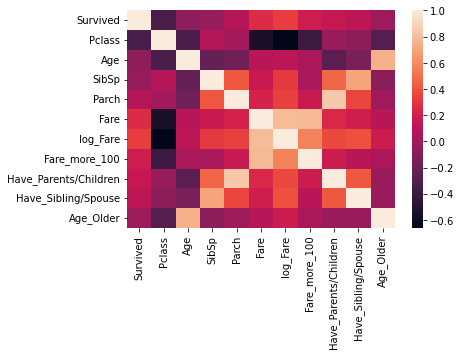

In [273]:
sns.heatmap(train_data.select_dtypes(exclude="object").corr())
plt.show()

## Create Target and Feature Varibales

In [399]:
from sklearn.preprocessing import OneHotEncoder

In [400]:
# Create X and y variables
X_train = train_data.drop("Survived" , axis=1)
y_train = train_data["Survived"]

In [401]:
# Cabin number Experiment is taken as Object varible but is not 
# Transoform it int 
X_train["Cabin_number_experiment"] = X_train["Cabin_number_experiment"].replace(["missing",""] , 0)
X_train["Cabin_number_experiment"] = X_train["Cabin_number_experiment"].astype(int)

In [402]:
# create the instance of the onehot
onehot = OneHotEncoder(handle_unknown="ignore")
# Encode the columbs 
encoded_features = onehot.fit_transform(X_train.select_dtypes(include="object")).toarray()

In [403]:
onehot.get_feature_names_out()

array(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_pos_experiment_A', 'Cabin_pos_experiment_B',
       'Cabin_pos_experiment_C', 'Cabin_pos_experiment_D',
       'Cabin_pos_experiment_E', 'Cabin_pos_experiment_F',
       'Cabin_pos_experiment_G', 'Cabin_pos_experiment_T',
       'Cabin_pos_experiment_missing'], dtype=object)

In [404]:
# Added onehot features to the exisiting train dataset
X_train = X_train.select_dtypes(exclude="object")
X_train[onehot.get_feature_names_out()] = encoded_features

In [408]:
X_train.head()

Pclass  Age  SibSp  Parch  log_Fare  Fare_more_100  \
PassengerId                                                       
1                 3   22      1      0  2.110213              0   
2                 1   38      1      0  4.280593              0   
3                 3   26      0      0  2.188856              0   
4                 1   35      1      0  3.990834              0   
5                 3   35      0      0  2.202765              0   

             Have_Parents/Children  Have_Sibling/Spouse  Age_Older  \
PassengerId                                                          
1                                0                    1          0   
2                                0                    1          0   
3                                0                    0          0   
4                                0                    1          0   
5                                0                    0          0   

             Cabin_number_experiment  ...  Embarked_S  Cabin_pos_experiment_A  \
PassengerId                           ...                                       
1                                  0  ...         1.0                     0.0   
2                                 85  ...         0.0                     0.0   
3                                  0  ...         1.0                     0.0   
4                                123  ...         1.0                     0.0   
5                                  0  ...         1.0                     0.0   

             Cabin_pos_experiment_B  Cabin_pos_experiment_C  \
PassengerId                                                   
1                               0.0                     0.0   
2                               0.0                     1.0   
3                               0.0                     0.0   
4                               0.0                     1.0   
5                               0.0                     0.0   

             Cabin_pos_experiment_D  Cabin_pos_experiment_E  \
PassengerId                                                   
1                               0.0                     0.0   
2                               0.0                     0.0   
3                               0.0                     0.0   
4                               0.0                     0.0   
5                               0.0                     0.0   

             Cabin_pos_experiment_F  Cabin_pos_experiment_G  \
PassengerId                                                   
1                               0.0                     0.0   
2                               0.0                     0.0   
3                               0.0                     0.0   
4                               0.0                     0.0   
5                               0.0                     0.0   

             Cabin_pos_experiment_T  Cabin_pos_experiment_missing  
PassengerId                                                        
1                               0.0                           1.0  
2                               0.0                           0.0  
3                               0.0                           1.0  
4                               0.0                           0.0  
5                               0.0                           1.0  

[5 rows x 24 columns]

In [409]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'log_Fare', 'Fare_more_100',
       'Have_Parents/Children', 'Have_Sibling/Spouse', 'Age_Older',
       'Cabin_number_experiment', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_pos_experiment_A',
       'Cabin_pos_experiment_B', 'Cabin_pos_experiment_C',
       'Cabin_pos_experiment_D', 'Cabin_pos_experiment_E',
       'Cabin_pos_experiment_F', 'Cabin_pos_experiment_G',
       'Cabin_pos_experiment_T', 'Cabin_pos_experiment_missing'],
      dtype='object')

## Training Models

### Building Pipelines

In [410]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [411]:
from sklearn.linear_model import SGDClassifier , RidgeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier 
from xgboost import XGBClassifier 

In [412]:
pipelines = {
    "sgd": make_pipeline(StandardScaler() , SGDClassifier()) , 
    "ridge": make_pipeline(StandardScaler() , RidgeClassifier()) ,
    "svm": make_pipeline(StandardScaler() , SVC()) ,
    "rf": make_pipeline(StandardScaler() , RandomForestClassifier()) ,
    "gb": make_pipeline(StandardScaler() , GradientBoostingClassifier()) ,
    "xgb": make_pipeline(StandardScaler() , XGBClassifier()) 
}

In [413]:
pipelines["xgb"].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('xgbclassifier',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
                 predictor=None, random_state=None, ...))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'xgbclassifier': XGBClassifier(base_score=None, booster=None, callbac

### Hyperparameter Grids

In [414]:
grid = {
    "sgd": {
        "sgdclassifier__alpha": [0.0001 , 0.001 , 0.01 , 0.1]
    } , 
    
    "ridge":{
        "ridgeclassifier__alpha" : [0.001, 0.01 , 0.1 , 1.0]
    } , 
    
    "svm": {
        "svc__kernel": ["linear" , "poly" , "rbf"] 
    } , 
    
    "rf" : {
        "randomforestclassifier__n_estimators": [50 , 100 , 200 , 400 ] ,
        "randomforestclassifier__max_depth" : [None , 2 , 4 , 8] 
    } , 
    
    "gb" : {
        "gradientboostingclassifier__max_depth" : [None , 2 , 4, 10 ] ,
        "gradientboostingclassifier__n_estimators" : [50 , 100 , 200 , 400]
    } , 
    
    "xgb" : {
        "xgbclassifier__n_estimators" : [50 , 75 , 100 , 400 ] , 
        "xgbclassifier__max_depth" : [None , 1 , 2 , 6, 9 ]
    }
    
}

### Training the models

In [415]:
from sklearn.model_selection import GridSearchCV

In [416]:
fit_models = {}

for algo , pipeline in pipelines.items():
    
    try:
        # Do training 
        print(f"Start Training - {algo}")
        model = GridSearchCV(pipeline , grid[algo] , n_jobs=-1 , cv=5)
        model.fit(X_train , y_train)
        fit_models[algo] = model
        print(f"Completed Training - {algo}")
        print("")
        
    except Exception as e:
        print(f"There was an error of this {algo} with an error - {e}")

Start Training - sgd
Completed Training - sgd

Start Training - ridge
Completed Training - ridge

Start Training - svm
Completed Training - svm

Start Training - rf
Completed Training - rf

Start Training - gb
Completed Training - gb

Start Training - xgb
Completed Training - xgb



In [418]:
for algo , trained_model in fit_models.items():
    print(f"{algo} ---> Score:{trained_model.best_score_} ---> Parameters:{trained_model.best_params_}")
    print("")

sgd ---> Score:0.7901261691042621 ---> Parameters:{'sgdclassifier__alpha': 0.001}

ridge ---> Score:0.7890151277383717 ---> Parameters:{'ridgeclassifier__alpha': 0.001}

svm ---> Score:0.8080848659845584 ---> Parameters:{'svc__kernel': 'rbf'}

rf ---> Score:0.8238089259933463 ---> Parameters:{'randomforestclassifier__max_depth': 8, 'randomforestclassifier__n_estimators': 200}

gb ---> Score:0.8372857949908982 ---> Parameters:{'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__n_estimators': 100}

xgb ---> Score:0.8339401167534994 ---> Parameters:{'xgbclassifier__max_depth': None, 'xgbclassifier__n_estimators': 50}



## Evaluation

### Apply transformation to the test data

In [419]:
### Apply Transformations to the Test Data
col_order = X_train.columns ; col_order

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'log_Fare', 'Fare_more_100',
       'Have_Parents/Children', 'Have_Sibling/Spouse', 'Age_Older',
       'Cabin_number_experiment', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_pos_experiment_A',
       'Cabin_pos_experiment_B', 'Cabin_pos_experiment_C',
       'Cabin_pos_experiment_D', 'Cabin_pos_experiment_E',
       'Cabin_pos_experiment_F', 'Cabin_pos_experiment_G',
       'Cabin_pos_experiment_T', 'Cabin_pos_experiment_missing'],
      dtype='object')

In [449]:
def transform_data(test_df , col_order , onehot , mean_age , embarked_mode , cabin_pos_number):
    
    X = test_df.copy()
    
    # Handling Missing Values 
    X["Age"] = X["Age"].fillna(mean_age)
    X["Embarked"] = X["Embarked"].fillna(embarked_mode)
    X["Cabin"] = X["Cabin"].fillna("missing")
    
    # FE - Creating Binary Features
    X["Have_Parents/Children"] = X["Parch"].apply(lambda x: 1 if x >= 1 else 0)
    X["Have_Sibling/Spouse"] = X["SibSp"].apply(lambda x: 1 if x >= 1 else 0)
    X["Age_Older"] = X["Age"].apply(lambda x: 1 if x > 40 else 0)
    X["Fare_more_100"] = X["Fare"].apply(lambda x : 1 if x > 100 else 0)
    
    # FE - Log Transformation 
    X["log_Fare"] = np.log(X["Fare"] + 1)
    
    # FE - Cabin - Pos and Number
    X["Cabin_pos_experiment"] = X["Cabin"].apply(lambda x : cabin_pos_number(x , False))
    X["Cabin_number_experiment"] = X["Cabin"].apply(lambda x : cabin_pos_number(x , True))
    
    X["Cabin_number_experiment"] = X["Cabin_number_experiment"].replace(["missing",""] , 0)
    X["Cabin_number_experiment"] = X["Cabin_number_experiment"].astype(int)
    
    # Drop Features 
    X.drop(["Name" , "Fare" , "Ticket", "Cabin"] , axis=1 , inplace=True) 
    
    # Encoding 
    print(X.select_dtypes(include="object").columns)
    encoded_cols = onehot.transform(X.select_dtypes(include="object")).toarray()
    X = X.select_dtypes(exclude="object")
    X[onehot.get_feature_names_out()] = encoded_cols
    
    return X[col_order]

In [450]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [451]:
X_test = transform_data(test_data , col_order , onehot , mean_age , "S" , cabin_pos_number)

missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
B45
missing
E31
missing
missing
missing
missing
missing
missing
missing
missing
missing
B57 B59 B63 B66
missing
B36
missing
A21
missing
missing
missing
missing
missing
C78
missing
missing
missing
missing
missing
missing
D34
missing
missing
D19
missing
A9
missing
D15
missing
C31
missing
missing
C23 C25 C27
missing
missing
missing
F G63
missing
B61
missing
missing
missing
missing
B57 B59 B63 B66
missing
missing
missing
C53
C23 C25 C27
missing
missing
missing
D43
C130
C132
missing
C101
missing
missing
missing
C55 C57
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
B71
missing
missing
missing
C46
missing
missing
missing
C116
missing
missing
missing
missing
missing
missing
missing
missing
F
missing
missing
A29
missing
C55 C57
missing
missing
G6
C6
missing
missing
missing
C28
missing
missing
missing
missing
missing
missing
missing
missing
C51
missing
missing
missing

In [459]:
X_test["log_Fare"] = X_test["log_Fare"].fillna(X_test["log_Fare"].mean())

In [463]:
X_test["Age"] = X_test["Age"].astype(int)

### Loading the best model 

In [466]:
best_model = fit_models["gb"]

### Make a prediction on the test dataset

In [468]:
yhat = best_model.predict(X_test)

In [485]:
res = pd.DataFrame([np.array(X_test.index) , yhat])
res = res.T
res.columns = ["PassengerId" , "Survived"]
res.set_index("PassengerId")


Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 0
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]

In [489]:
res.to_csv("titanic/firstSubmission.csv", index=False)

In [497]:
res["Survived"].value_counts()[0]

276

In [498]:
test_ratio_survived = res["Survived"].value_counts()[1] / res["Survived"].value_counts()[0]

In [500]:
train_ratio_survived = y_train.value_counts()[1] / y_train.value_counts()[0]

In [501]:
test_ratio_survived

0.5144927536231884

In [502]:
train_ratio_survived

0.6229508196721312